In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, utils, datasets, viz, audio

# Stereo Impulse Dataset

This dataset contains random synthetic sounds designed to be easy to inspect. The first sample is randomly drawn from a binomial distribution, and the following samples are zero.

In [3]:
ds = datasets.StereoImpulse(2**14, 5, model.HParams(), (0.3, 0.7))

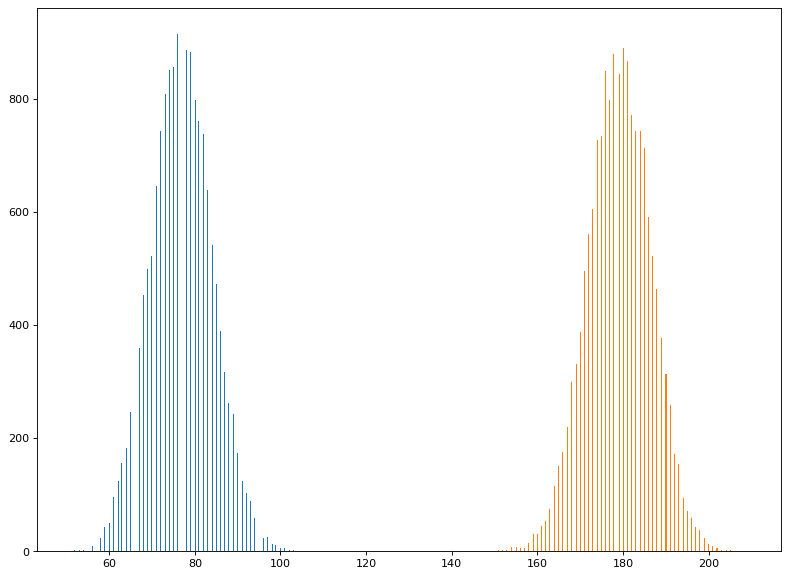

In [4]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(ds[:, 0, 0][1].numpy(), bins=256);
plt.hist(ds[:, 1, 0][1].numpy(), bins=256);

# Track Dataset

A dataset of slices taken from a single track.

## Uncompressed

Do not mu compress the data from 16 bit to 8 bit audio. We set `n_classes` to `2**16` to reflect the given bit depth since this affects the transforms applied to the dataset.

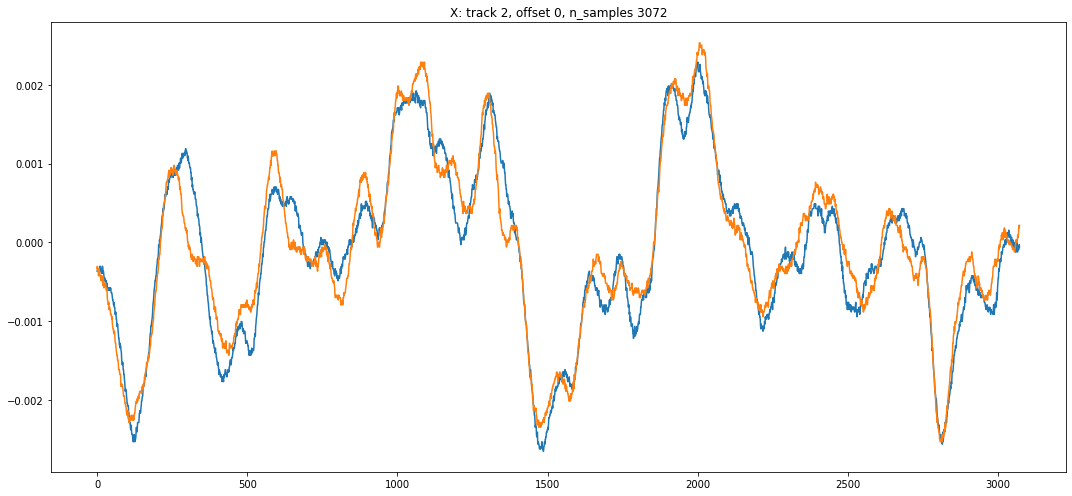

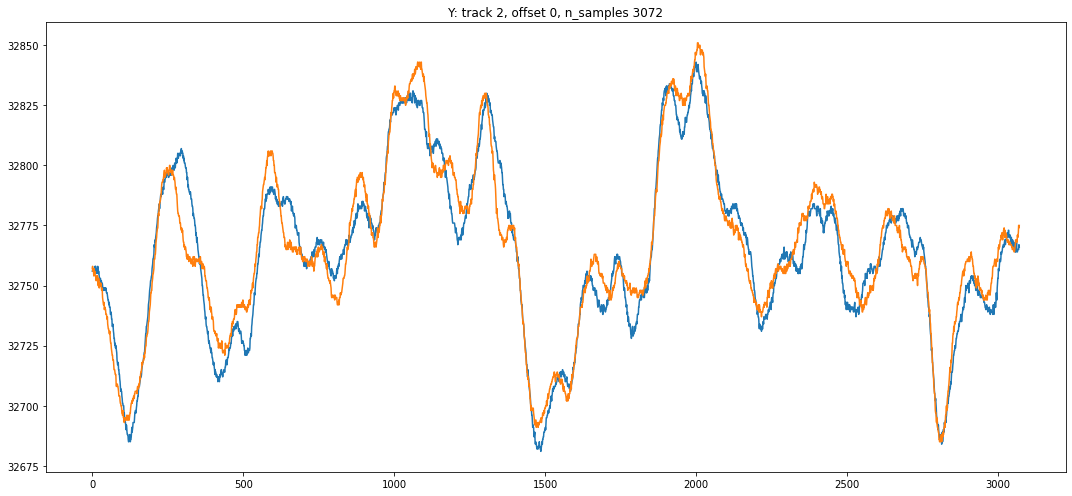

In [5]:
def track_dataset(compress=None, n_classes=None):
    p = model.HParams(compress=compress, n_classes=n_classes)
    X, Y = datasets.to_tensor(datasets.Track('fixtures/short.wav', p))
    n_samples = p.receptive_field_size()
    track_i = viz.plot_track(X, n_samples=n_samples, title='X')
    viz.plot_track(Y, track_i, n_samples=n_samples, title='Y')
    track = X[track_i].numpy()
    if p.compress: track = audio.mu_expand(track, p)
    return ipd.Audio(track, rate=p.sampling_rate)
    
track_dataset(compress=False, n_classes=2**16)

## Compressed

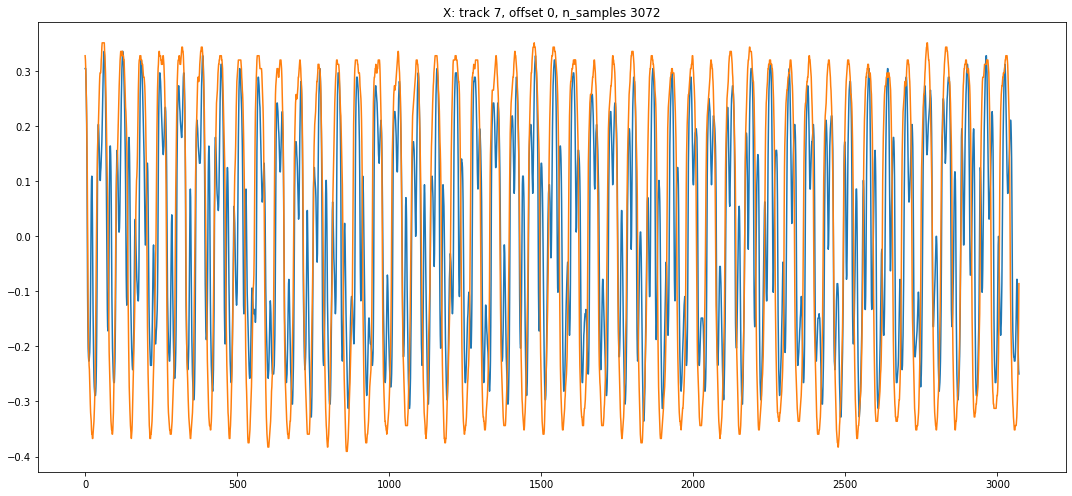

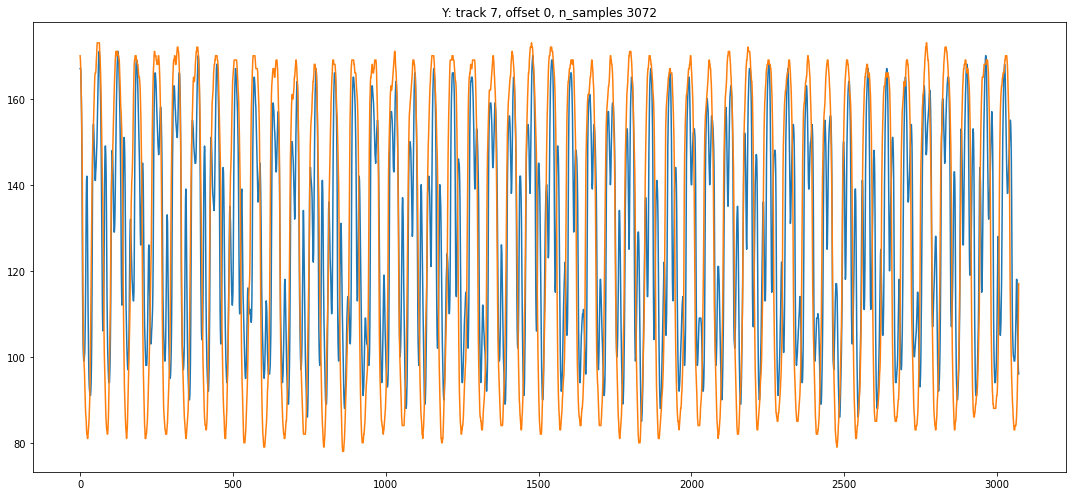

In [6]:
track_dataset(compress=True, n_classes=2**8)

# Sines Dataset

A dataset of sine waves. Let's begin by superimposing some samples, where the number of total samples is low ~200 and the sampling rate is very high, and thus able to capture high frequencies at this resolution.

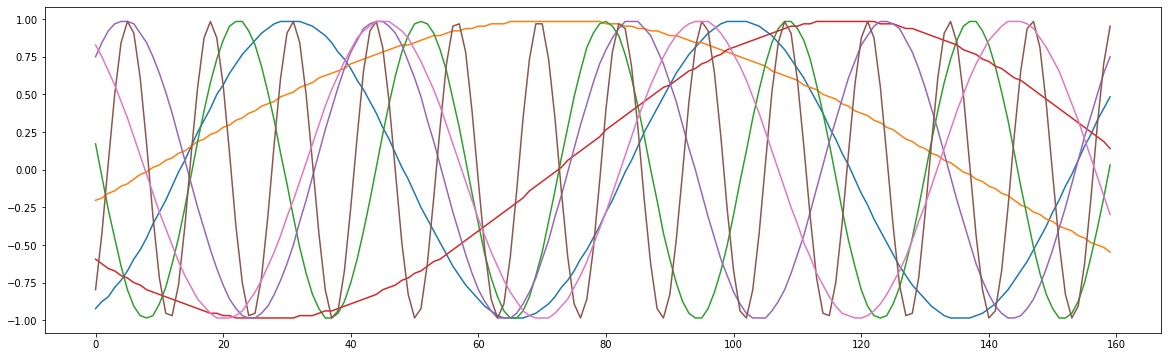

In [7]:
def sines(n_samples, sample_length=160, sampling_rate=2**18):
    p = model.HParams(compress=False, n_classes=2**7, sample_length=sample_length, sampling_rate=sampling_rate)
    ds = datasets.Sines(n_samples, p, amp=1.)
    return datasets.to_tensor(ds), p

def sines_dataset_superimposed(n_samples=7):
    (X, Y), p = sines(n_samples)
    plt.figure(figsize=(20, 6))
    for i in range(n_samples):
        plt.plot(X[i, 0, :])
    
sines_dataset_superimposed()

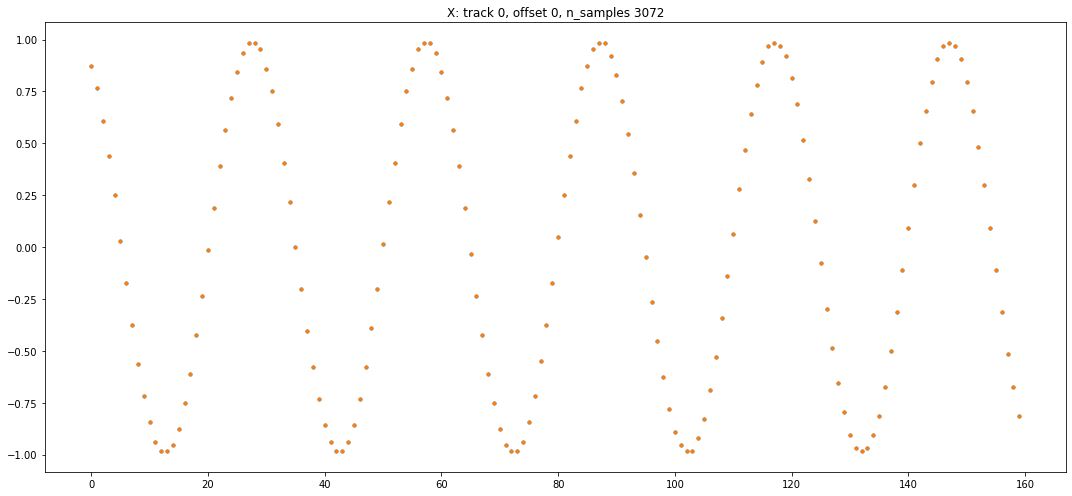

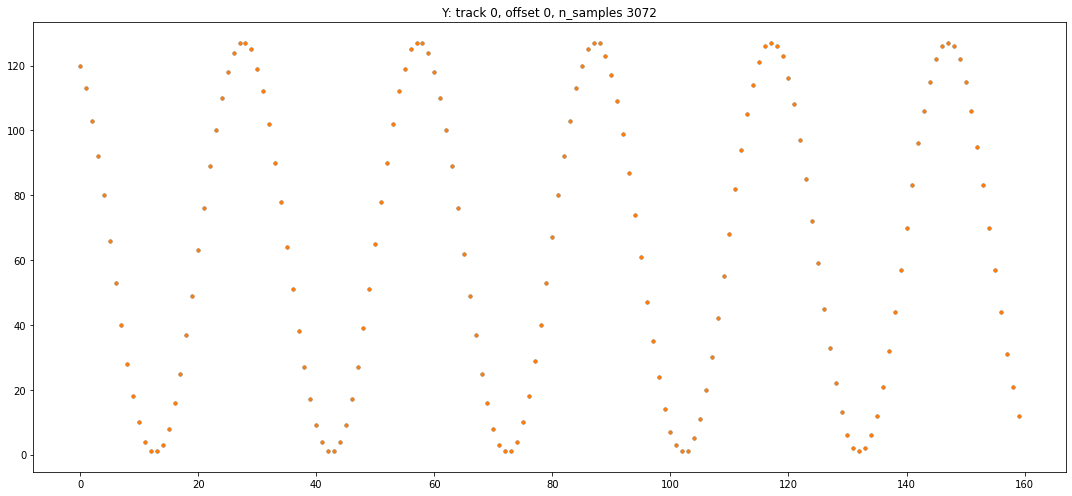

In [8]:
def sines_dataset(n_samples=1):
    (X, Y), p = sines(n_samples)
    n_samples = p.receptive_field_size()
    track_i = viz.plot_track(X, n_samples=n_samples, title='X', style='.')
    viz.plot_track(Y, track_i, n_samples=n_samples, title='Y', style='.')
    
sines_dataset()

In [9]:
def sines_dataset_listen(n_samples=4):
    (x, y), p = sines(n_samples, sample_length=8000, sampling_rate=16000)
    for i in range(n_samples):
        display(ipd.Audio(x[i], rate=p.sampling_rate))
        
sines_dataset_listen()